In [55]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('uber-raw-data-apr14.csv')

In [32]:
#Display head of dataset
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [34]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [35]:
#Check missing values or null values, same as above

def num_missing(x):
    return sum(x.isnull())
print('Number of missing/nul values per column')
print(df.apply(num_missing, axis=0))



Number of missing/nul values per column
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [36]:
df.isna().sum()# alternative to above

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [37]:
#Extract additional information

df['Date/Time'] = pd.to_datetime(df['Date/Time'], format = '%m/%d/%Y %H:%M:%S')
df['DayOfWeekNum'] = df['Date/Time'].dt.dayofweek
df['DayOfWeek']= df['Date/Time'].dt.day_name()
df['DayNum'] = df['Date/Time'].dt.day
df['HourOfDay'] = df['Date/Time'].dt.hour

In [38]:
#Display head
df.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,DayNum,HourOfDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0


In [39]:
df.shape

(564516, 8)

In [40]:
#Unique base codes

df['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

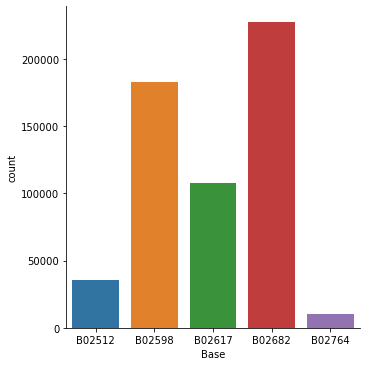

In [41]:
#Total rides based on the base code

sns.catplot(x='Base', data = df , kind = 'count')

In [43]:
uber_week_data = df.pivot_table(index = ['DayOfWeekNum', 'DayOfWeek'], values = 'Base', aggfunc= 'count')
uber_week_data

,,Base
DayOfWeekNum,DayOfWeek,
0,Monday,60861
1,Tuesday,91185
2,Wednesday,108631
3,Thursday,85067
4,Friday,90303
5,Saturday,77218
6,Sunday,51251


<AxesSubplot:xlabel='DayOfWeekNum,DayOfWeek'>

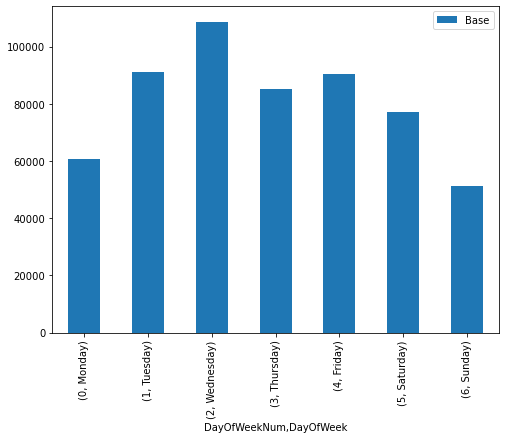

In [44]:
# Visualize above pivot table
uber_week_data.plot(kind='bar', figsize=(8,6))

In [ ]:
# Visualize the booking based on hour of the day

<AxesSubplot:title={'center':'Hourly Journeys'}, xlabel='HourOfDay'>

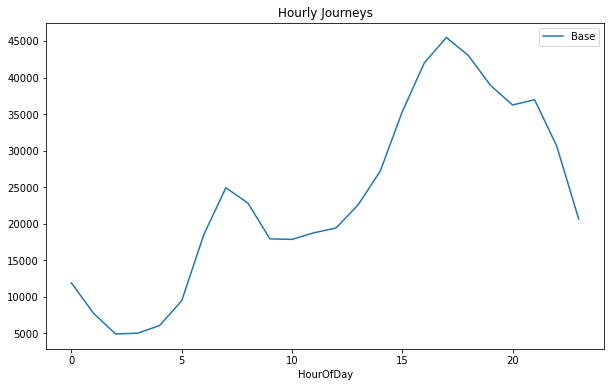

In [46]:
uber_hourly_data = df.pivot_table(index= ['HourOfDay'], values= 'Base', aggfunc = 'count')
uber_hourly_data.plot(kind= 'line', figsize=(10,6), title= 'Hourly Journeys')

In [ ]:
# the trend is there are less booking in the night and pickup during earlyhours of the day
#during evening times uber bookings are high from 4pm to 6pm and dip at 8pm

In [ ]:
# Now Analyse number of Uber booking based on each day in April 2014

<AxesSubplot:title={'center':'Journey by DayNum'}, xlabel='DayNum'>

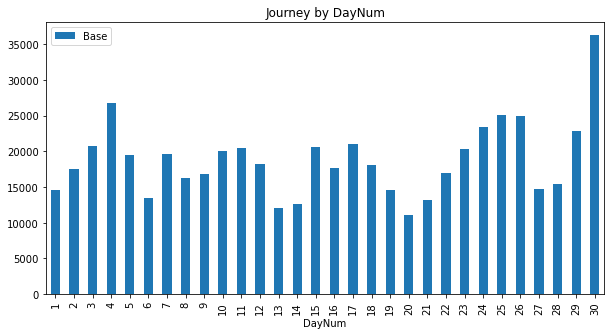

In [49]:
uber_day_data = df.pivot_table( index= ['DayNum'], values = 'Base', aggfunc='count')
uber_day_data.plot(kind='bar', figsize=(10,5), title = 'Journey by DayNum')

In [ ]:
# 30 April  has highest booking followed by 4th of April

In [51]:
# count no of trips in april using groupby
def count_rows(rows):
    return len(rows)

by_date = df.groupby('DayNum').apply(count_rows)
by_date

DayNum
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [52]:
# sort day of the month by values rather than date

by_date_sorted = by_date.sort_values()
by_date_sorted

DayNum
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

In [ ]:
# Above cell we can say 20th April has lowest no of trips. 30th has highes followed by 4th

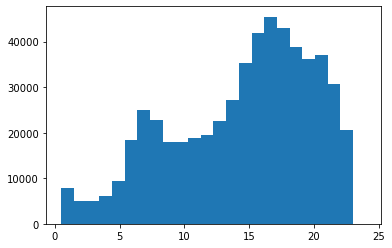

In [64]:
# Analyse by hours

plt.hist(df.HourOfDay, bins= 24, range= (.5, 24));


In [ ]:
# Above histogram is similar to line graph plotted earlier

In [65]:
#create a crosstable to analyse uber booking based on day of week num and hour of day
count_rows(df)
by_hour_weekday = df.groupby('HourOfDay DayOfWeekNum'.split()).apply(count_rows).unstack()
by_hour_weekday
                                        

DayOfWeekNum,0,1,2,3,4,5,6
HourOfDay,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


<AxesSubplot:xlabel='DayOfWeekNum', ylabel='HourOfDay'>

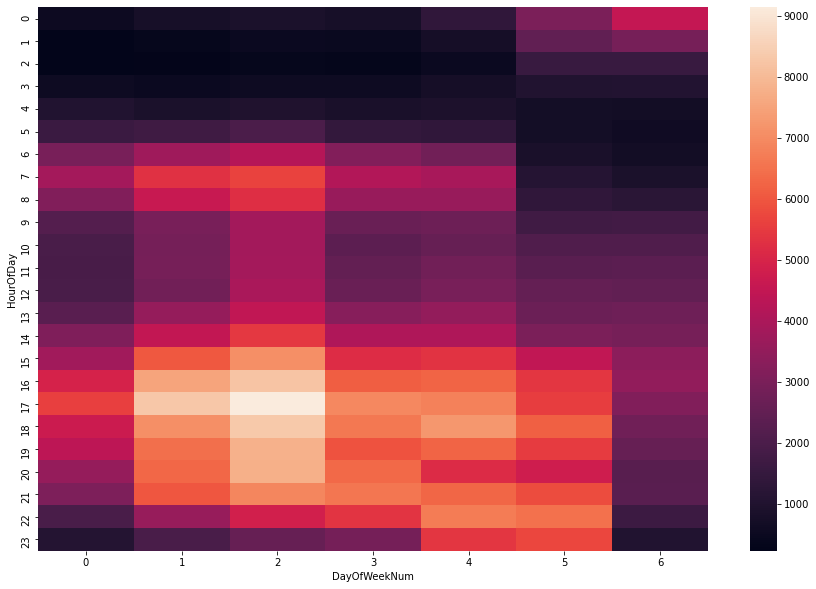

In [70]:
#heat map the brightest spot shows the day/hour with the highest frequency

plt.figure(figsize= (15, 10))
sns.heatmap(by_hour_weekday)

In [ ]:
# From heatmap we can conclude that 5pm on wednesday has highest number of booking as this region is the brightest